<a href="https://colab.research.google.com/github/marz1307/Monitoring-Player-Performance-and-Scouting-in-Football/blob/main/Offensive_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Visual Data Exploration*

For the offensive features, which include dribbling, take-on, and shot actions, we classify them collectively as offensive actions. The frequency at which these actions are attempted is presumed to establish distinct boundaries, aiding in the grouping of individual players.

In [ ]:
import pandas
offensive = pandas.read_csv("/content/drive/MyDrive/turk/dt.csv")
offensive.head()

Unnamed: 0  dribble  take_on  shot  player_id
0           0       55       23     3     8643.0
1           1      242       44    56       93.0
2           2       84        7    38     9206.0
3           3       94       16     8     8433.0
4           4      235       99    46     9637.0

In [ ]:
player_name = pandas.read_csv("/content/drive/MyDrive/turk/Data/players.csv",usecols=["lastName","wyId"])
player_name.columns = ["name" ,"player_id"]
player_name.head(20)

name  player_id
0                         Tekin      32777
1                          Sarr     393228
2                      Mandanda     393230
3                       N'Diaye      32793
4                   Konat\u00e9     393247
5                     Cillessen         33
6                  Alderweireld         36
7                    Vertonghen         48
8                         Djiku     229427
9             Dannemann Eriksen         54
10                     Sabitzer      65596
11         Sig\u00fe\u00f3rsson         66
12                  Traor\u00e9     393284
13                    Moisander         77
14                     Benschop         91
15  Berg Gu\u00f0munds\u00adson         93
16                   Tyto\u0144         99
17                 Guedes Filho        102
18                      Willems        110
19                   Al Tameemi     131184

In [ ]:
offensive = offensive.merge(player_name,on=["player_id"])

The plot illustrates the relationship between take-ons and dribbles. This visualization is crucial for determining the most suitable clustering algorithm for the task. The data exhibits one densely populated group and a sparsely distributed group, making algorithms like k-means clustering particularly effective in this scenario.

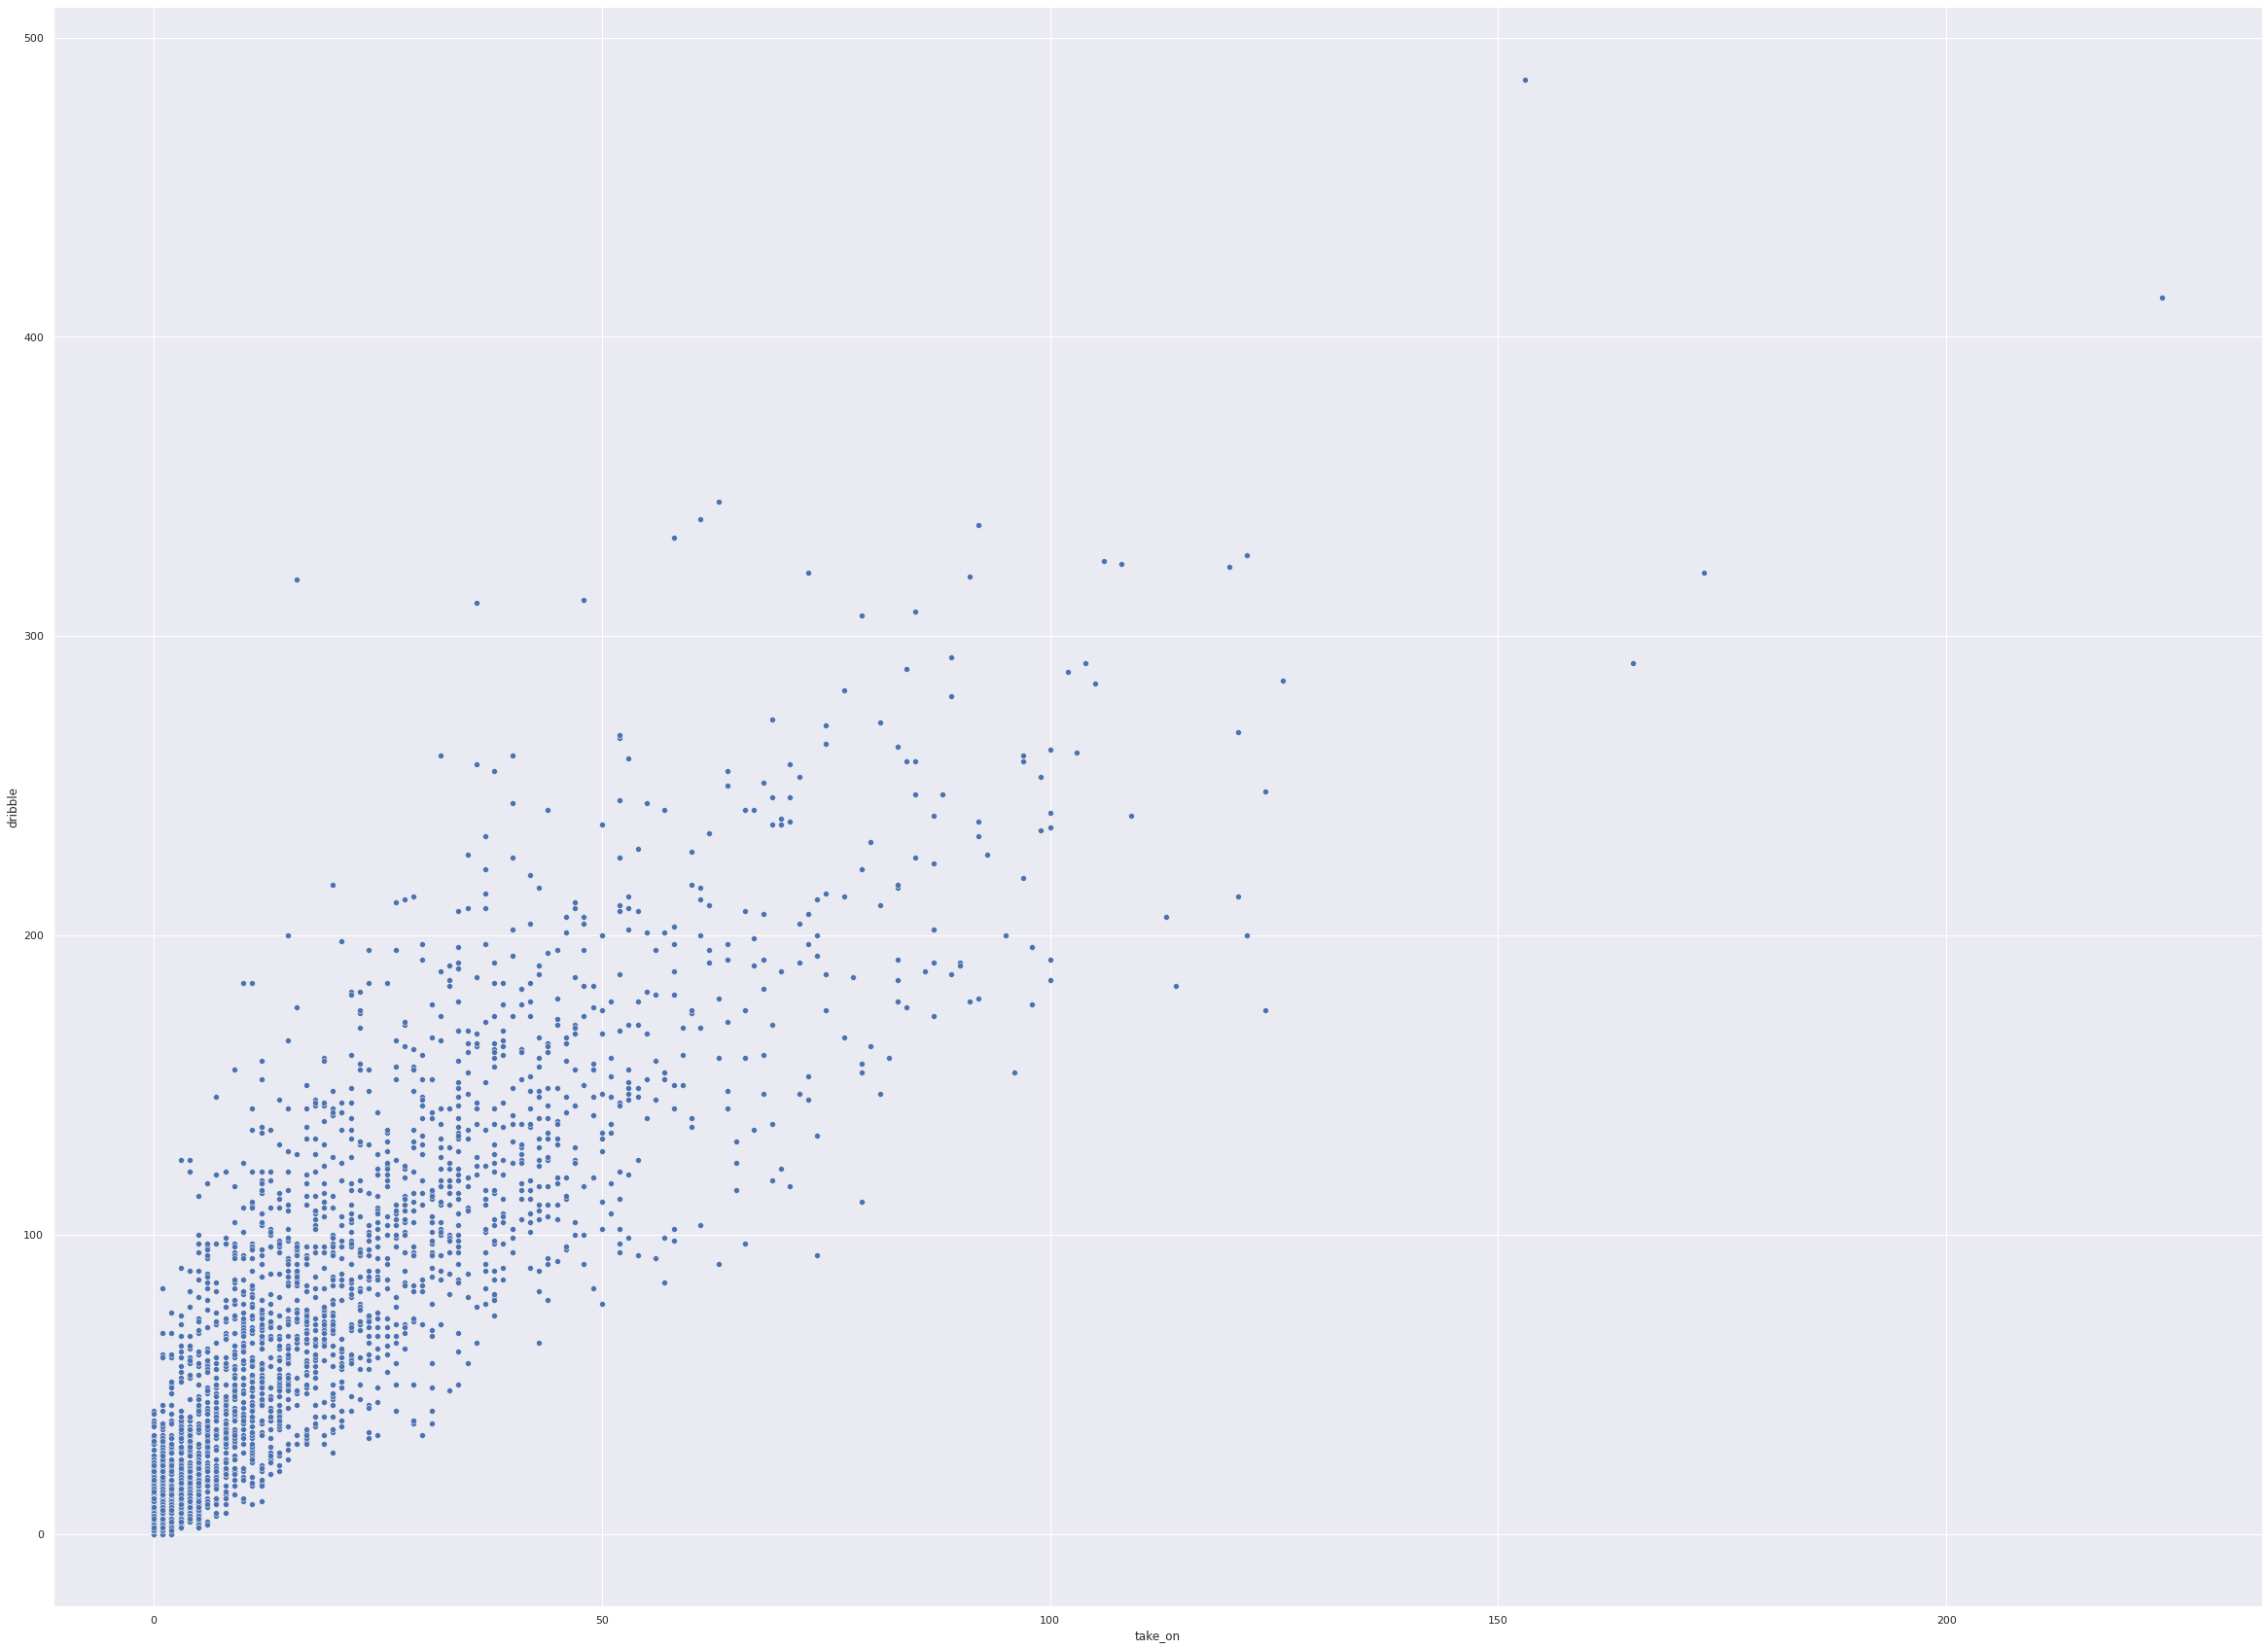

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40.7,30.27)})
sns.scatterplot(data=offensive , y="dribble" , x="take_on")

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))


Assigning labels to points with their corresponding names further supports the assumption that the sparse data on the far left of the graph represents a group of similar players. Players like Hazard, Messi, and Neymar dos Santos Junior all fall into this region. While k-Nearest Neighbors (kNN) would be suitable for this problem, the unlabeled nature of the data makes kNN impractical. K-means clustering, on the other hand, appears to be a promising candidate for exploration.

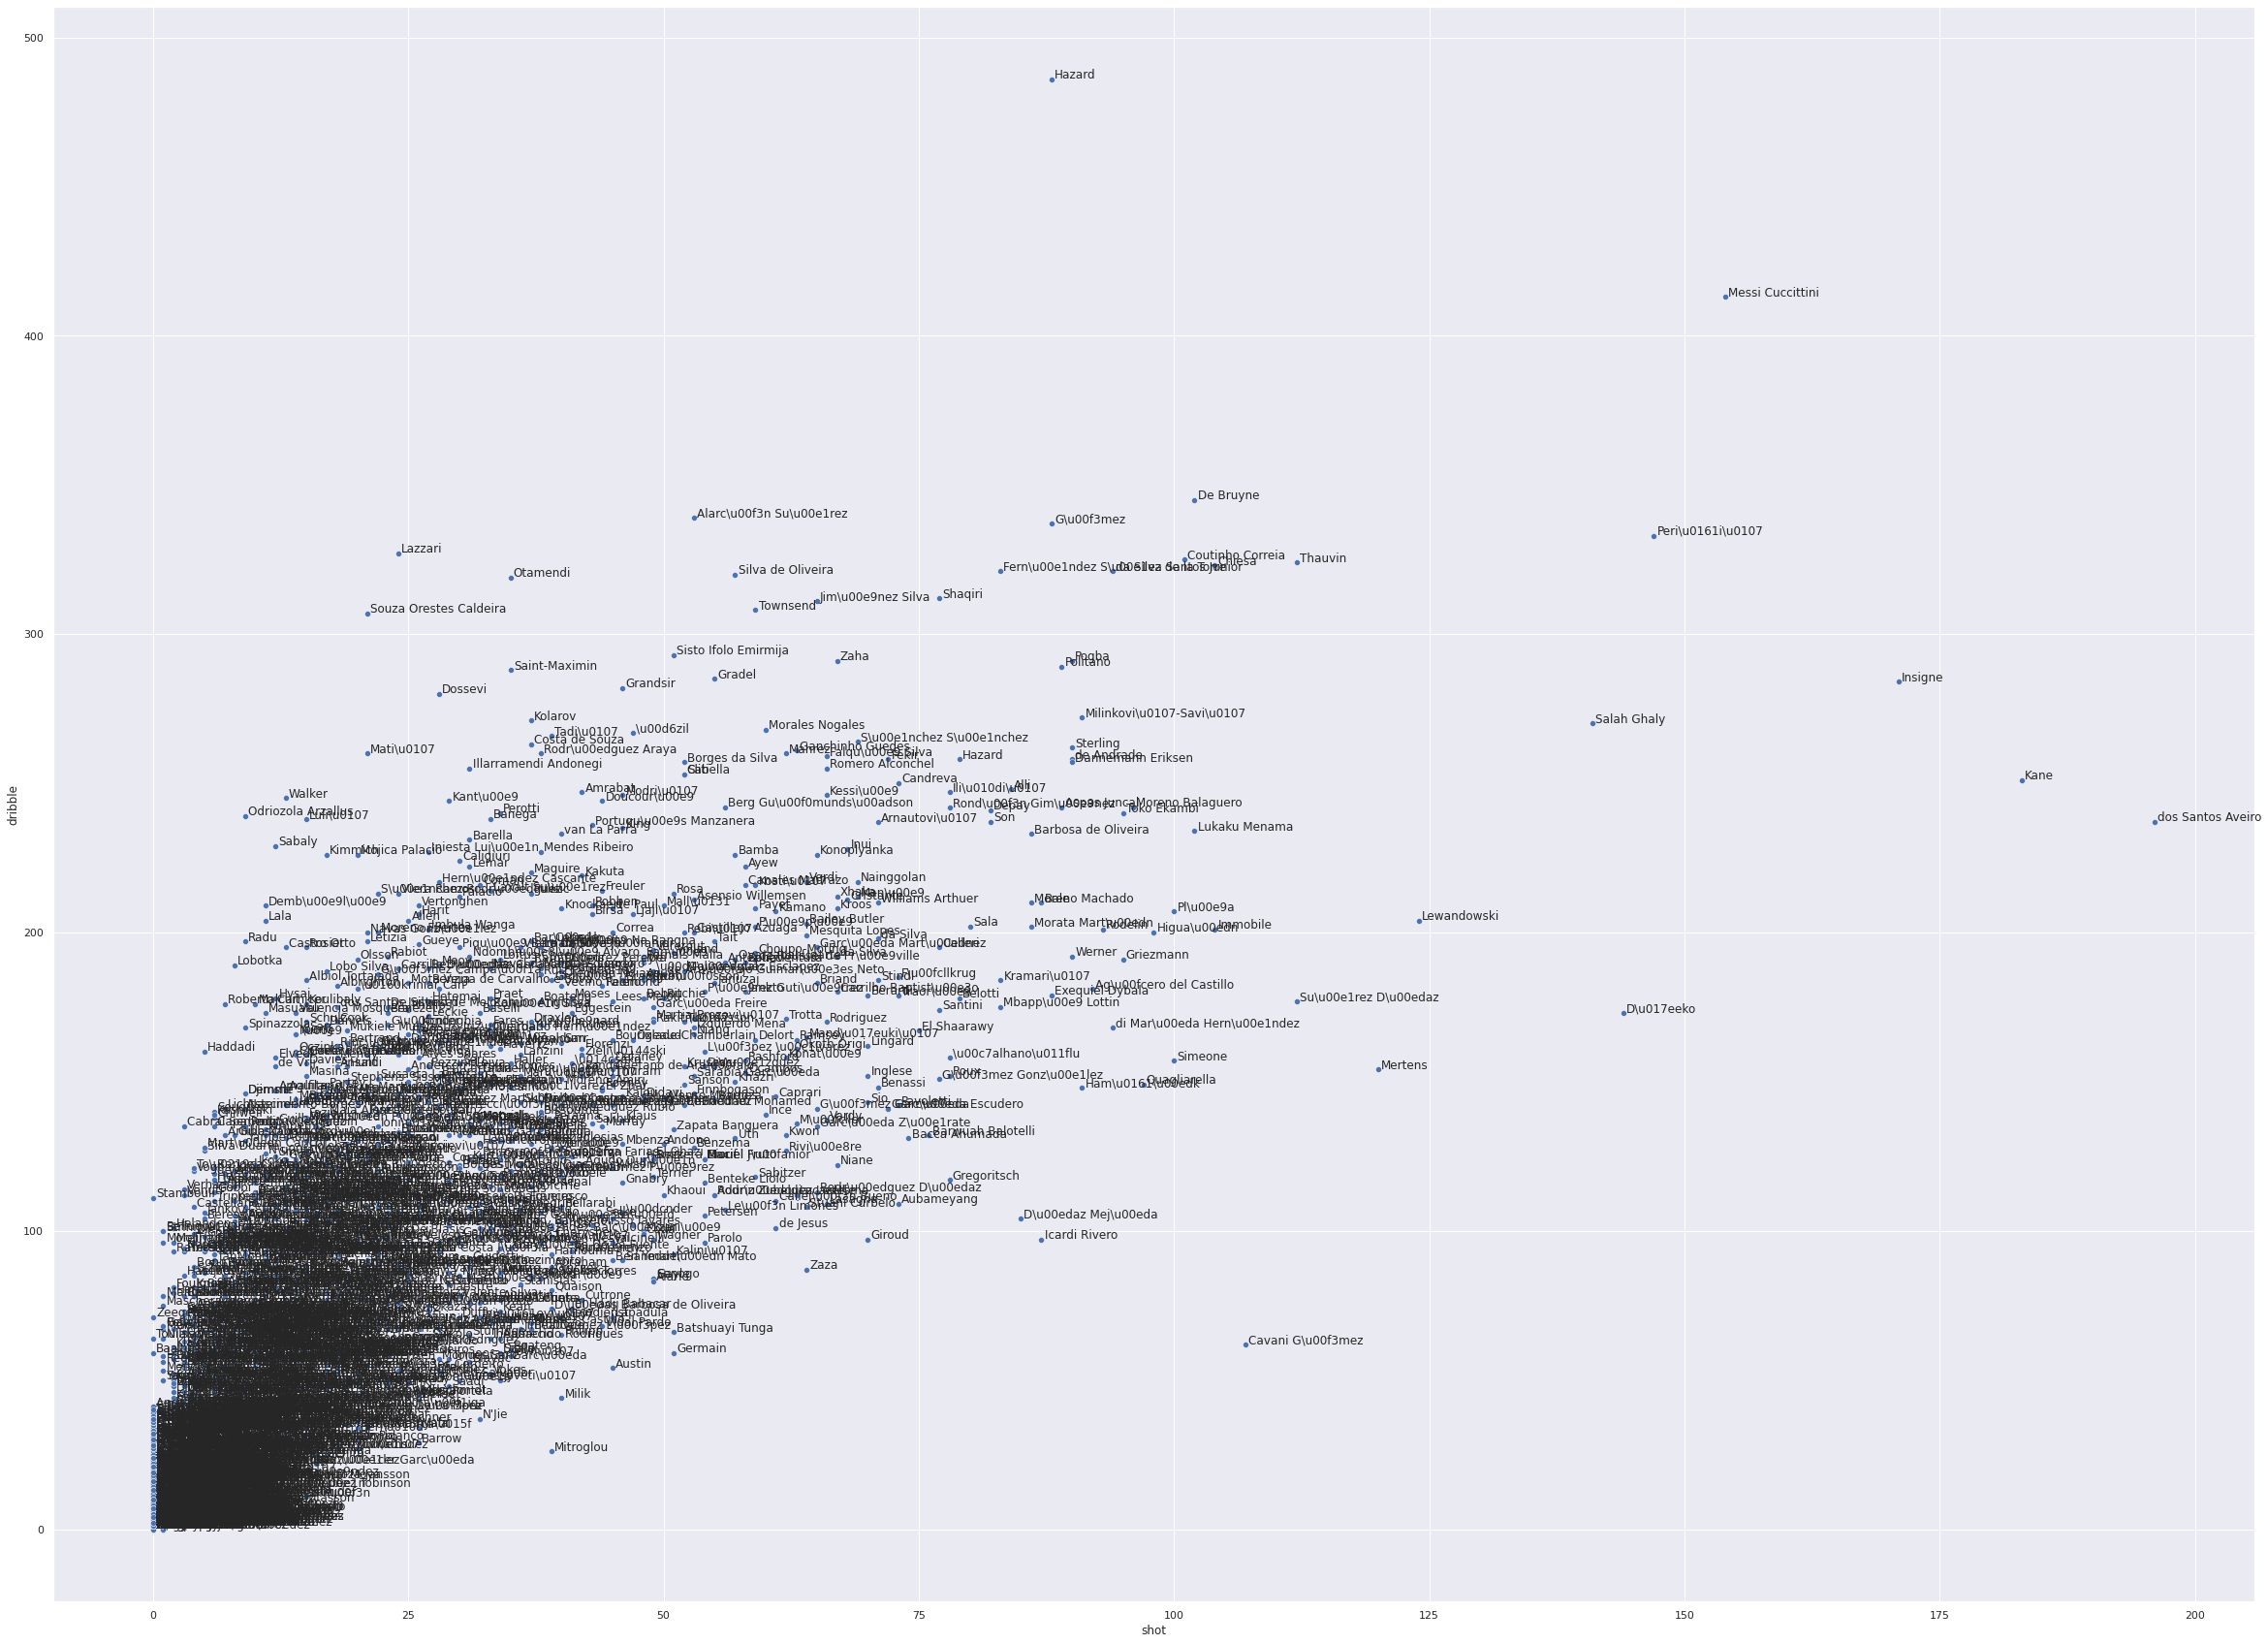

In [ ]:
import seaborn as sns
plt =sns.scatterplot(data=offensive , y="dribble" , x="shot")
plt_names = offensive
for i in range(plt_names.shape[0]):
 plt.text(y=plt_names.dribble[i]+0.3,x=plt_names.shot[i]+0.3,s=plt_names.name[i])

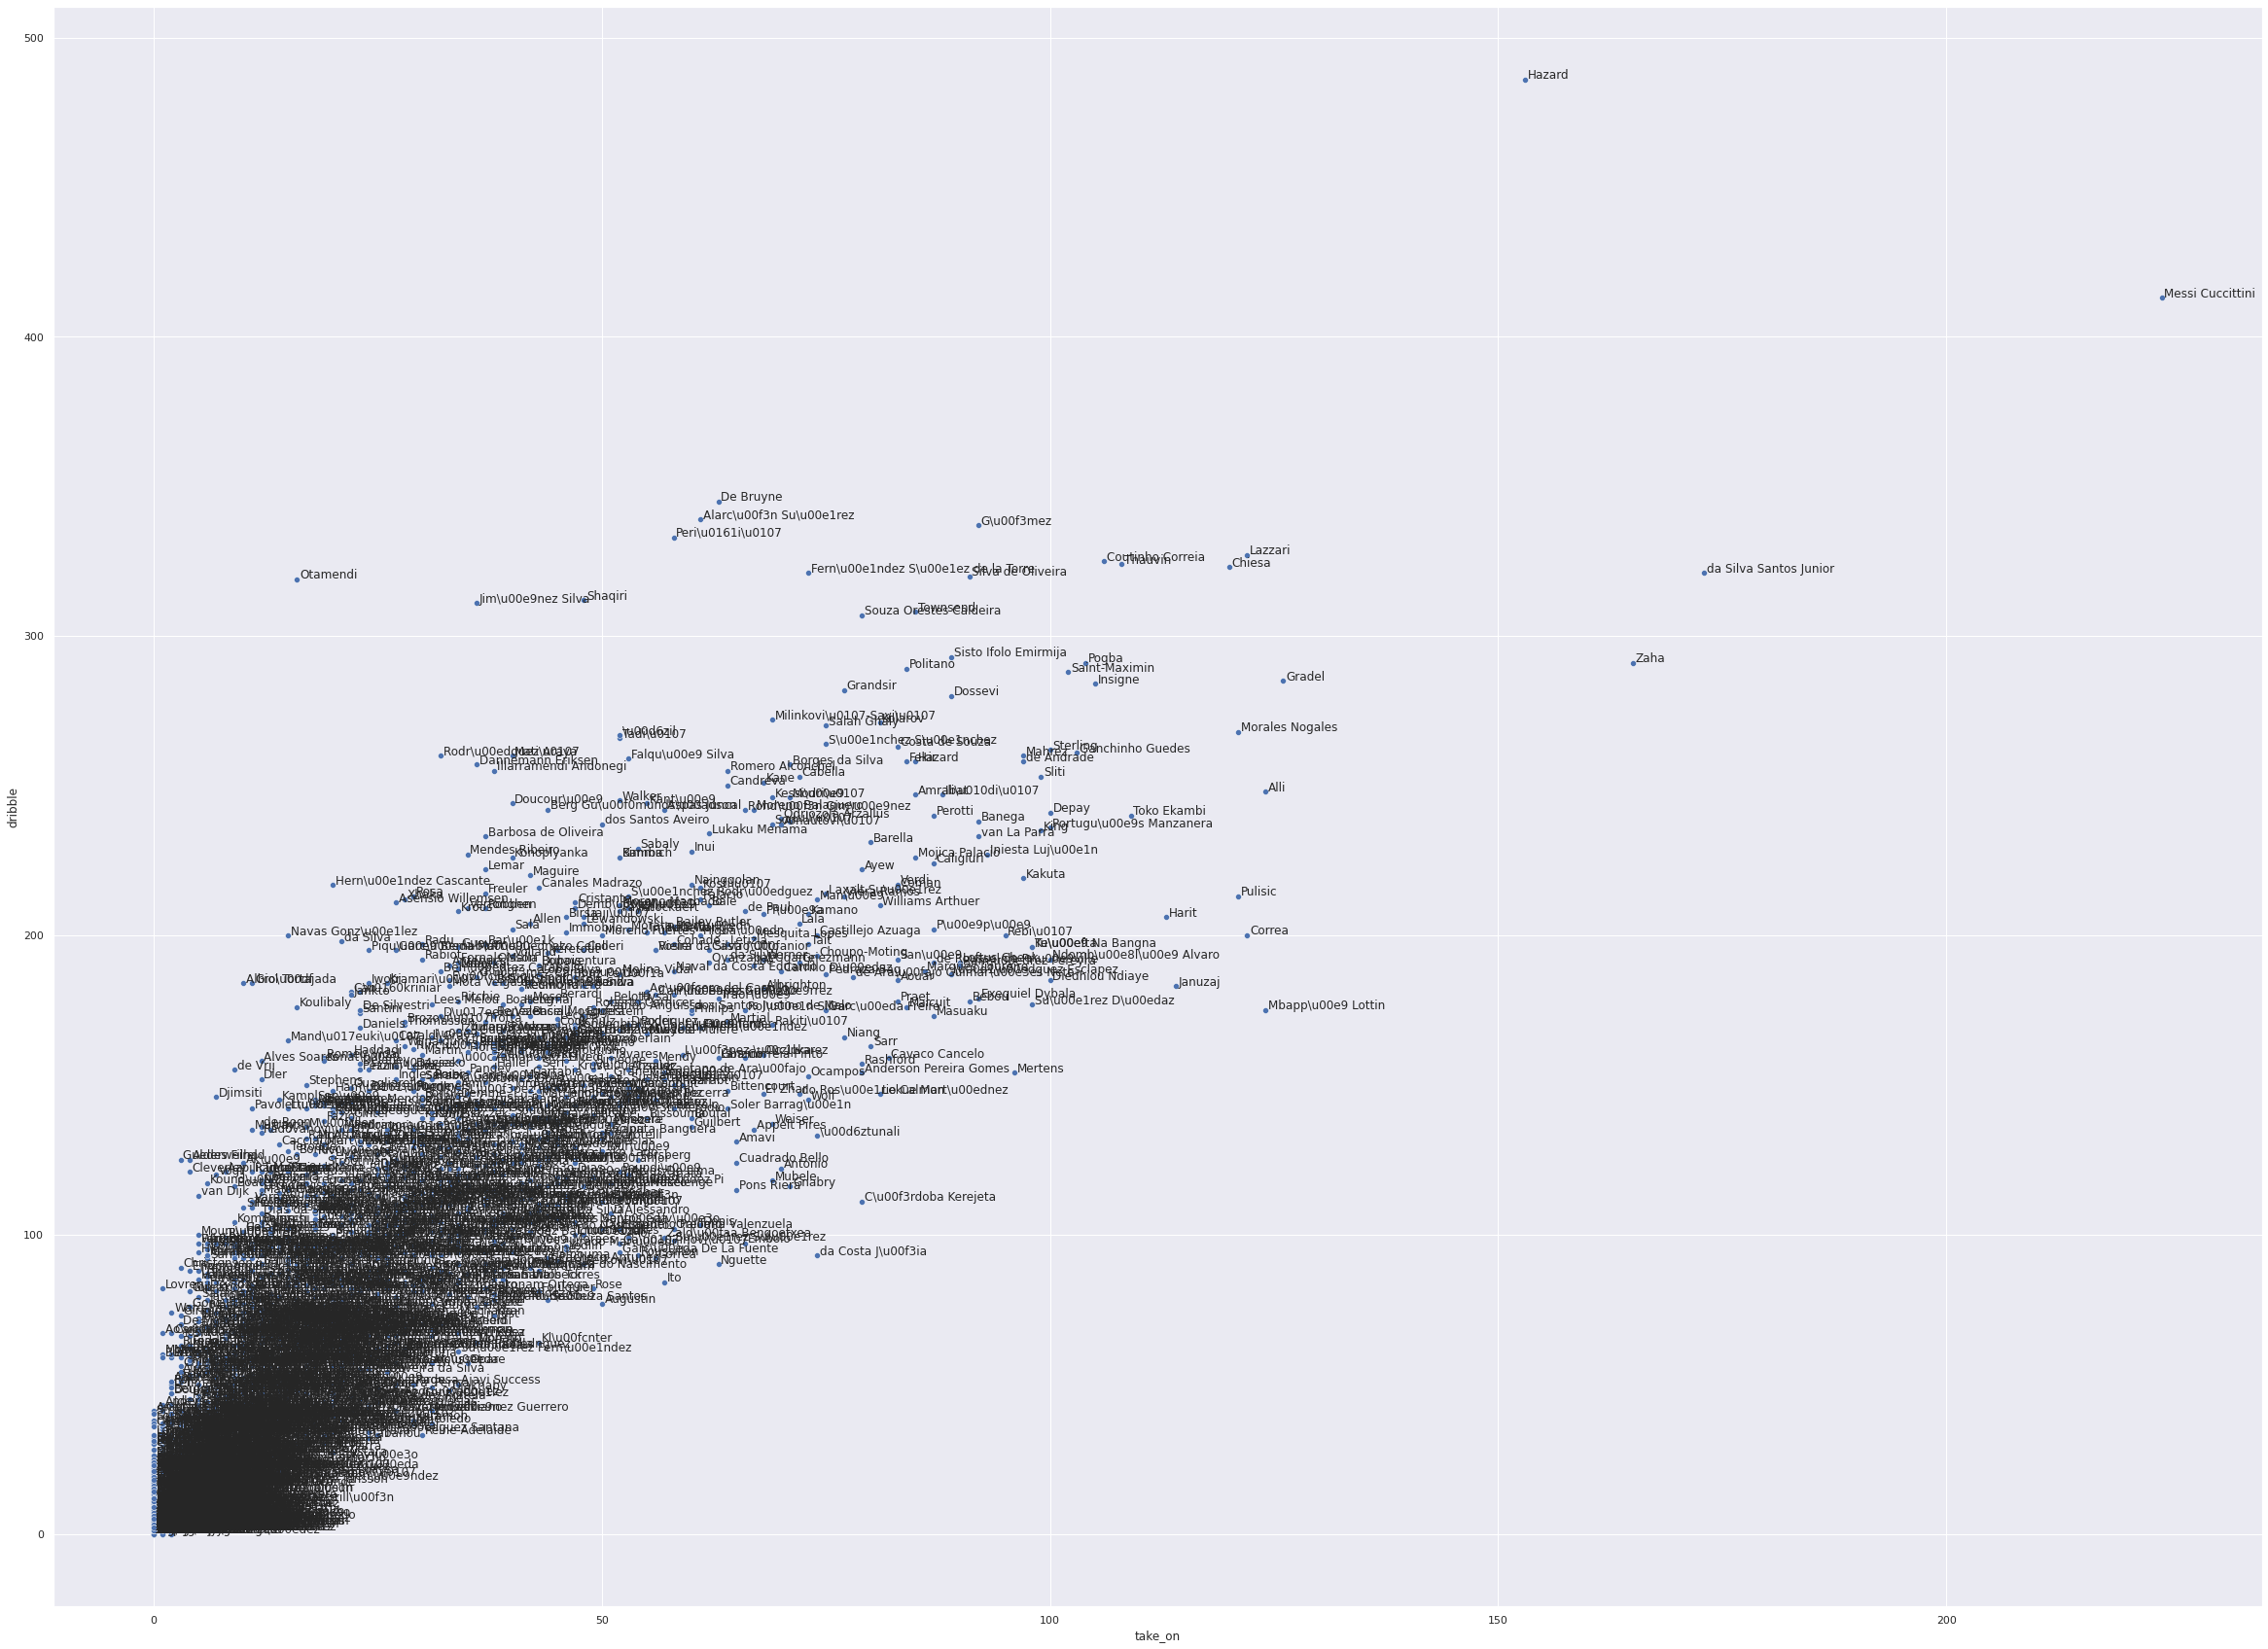

In [ ]:
import seaborn as sns
plt =sns.scatterplot(data=offensive , y="dribble" , x="take_on")
plt_names = offensive
for i in range(plt_names.shape[0]):
 plt.text(y=plt_names.dribble[i]+0.3,x=plt_names.take_on[i]+0.3,s=plt_names.name[i])

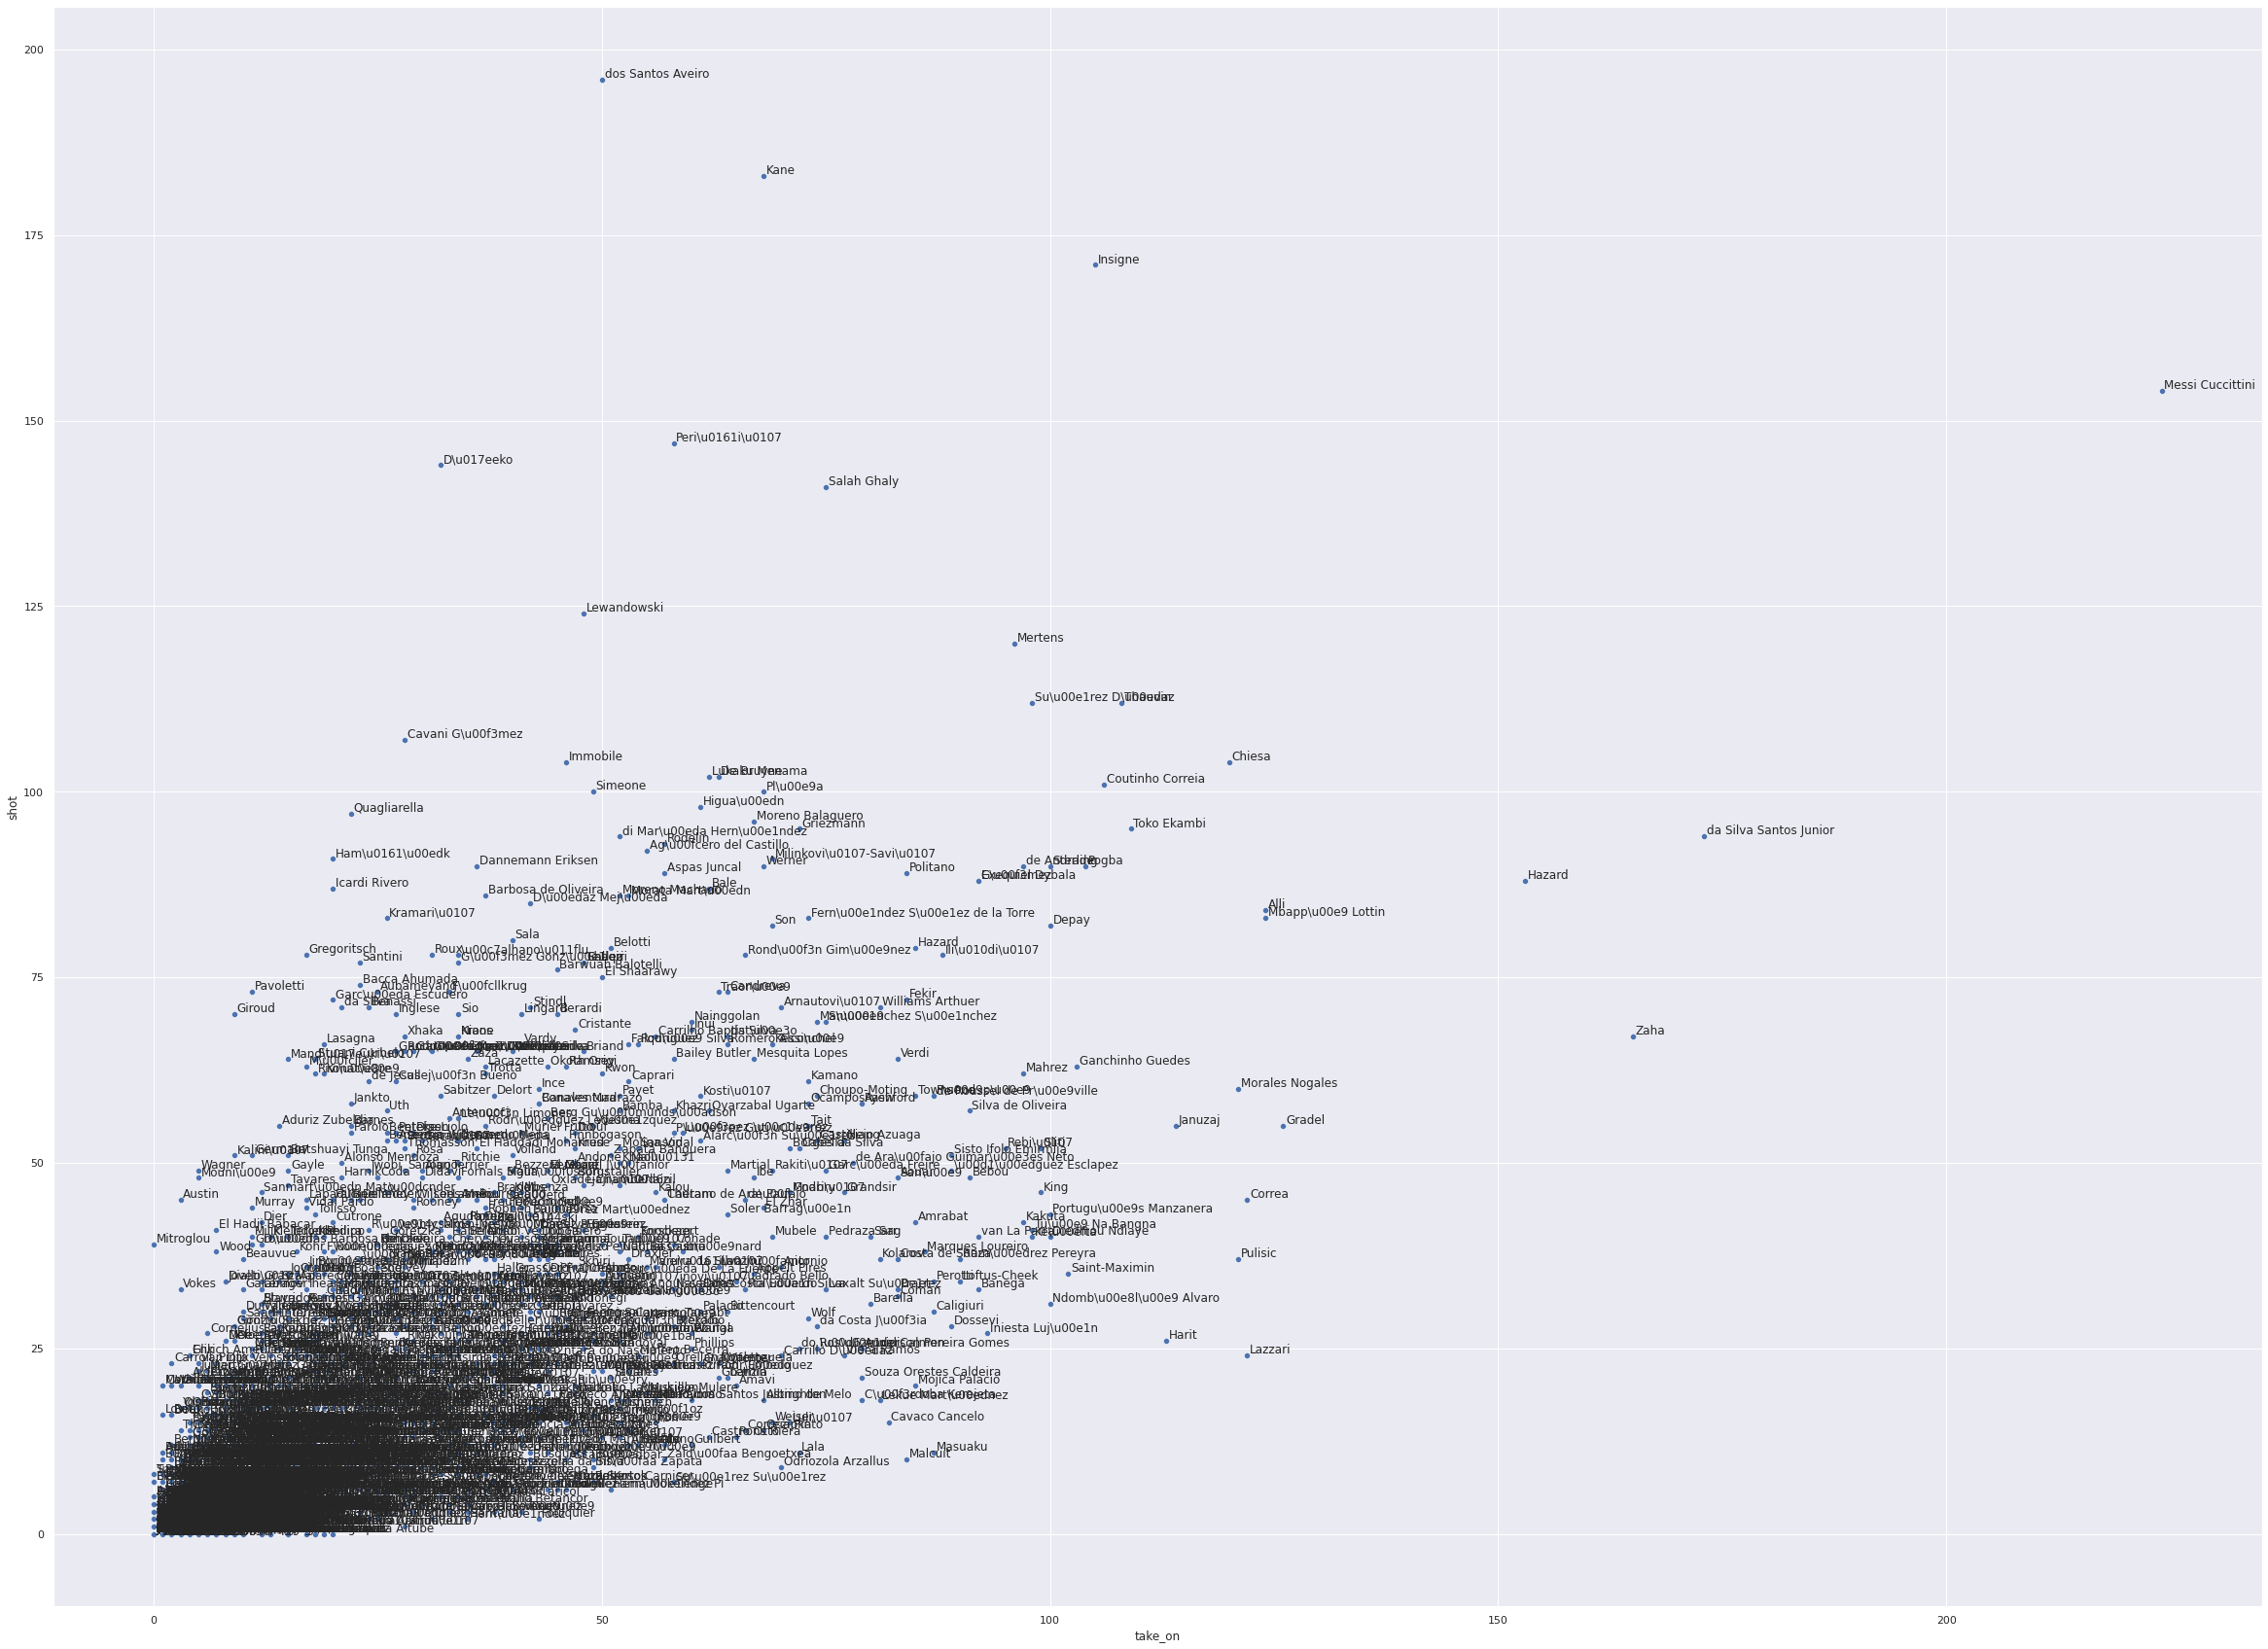

In [ ]:
import seaborn as sns
plt =sns.scatterplot(data=offensive , y="shot" , x="take_on")
plt_names = offensive
for i in range(plt_names.shape[0]):
 plt.text(y=plt_names.shot[i]+0.3,x=plt_names.take_on[i]+0.3,s=plt_names.name[i])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


def kcluster(data , k):

  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)


  return kmeans.predict(data)




In [ ]:
data = offensive[['shot' , 'dribble' , 'take_on']]
kcluster(data , 5)
offensive["class"] = kcluster(data , 5)
offensive.head()


Unnamed: 0  dribble  take_on  shot  player_id                         name  \
0           0       55       23     3     8643.0                       Lowton   
1           1      242       44    56       93.0  Berg Gu\u00f0munds\u00adson   
2           2       84        7    38     9206.0                         Wood   
3           3       94       16     8     8433.0                         Ward   
4           4      235       99    46     9637.0                         King   

   class  
0      4  
1      1  
2      3  
3      3  
4      1

In [ ]:
import seaborn as sns
def plot_result(data,y,x,hue,palette, name=True):
  plt =sns.scatterplot(data=data , y=y , x=x , hue=hue, palette=palette)
  plt_names = offensive
  for i in range(plt_names.shape[0]):
    plt.text(y=plt_names[y][i]+0.3,x=plt_names[x][i]+0.3,s=plt_names.name[i])

In [ ]:
using kmeans with k= 5 and ecludean distance , this initial parameters perfformed okay , however we note a major missclassification where , players like kane , insigne , messi and hazard being grouped in the same class , this defeats the whole purpose of our system

Utilizing k-means with \(k=5\) and Euclidean distance initially showed acceptable performance. However, a notable misclassification occurred, grouping players like Kane, Insigne, Messi, and Hazard in the same class, undermining the intended purpose of the system.

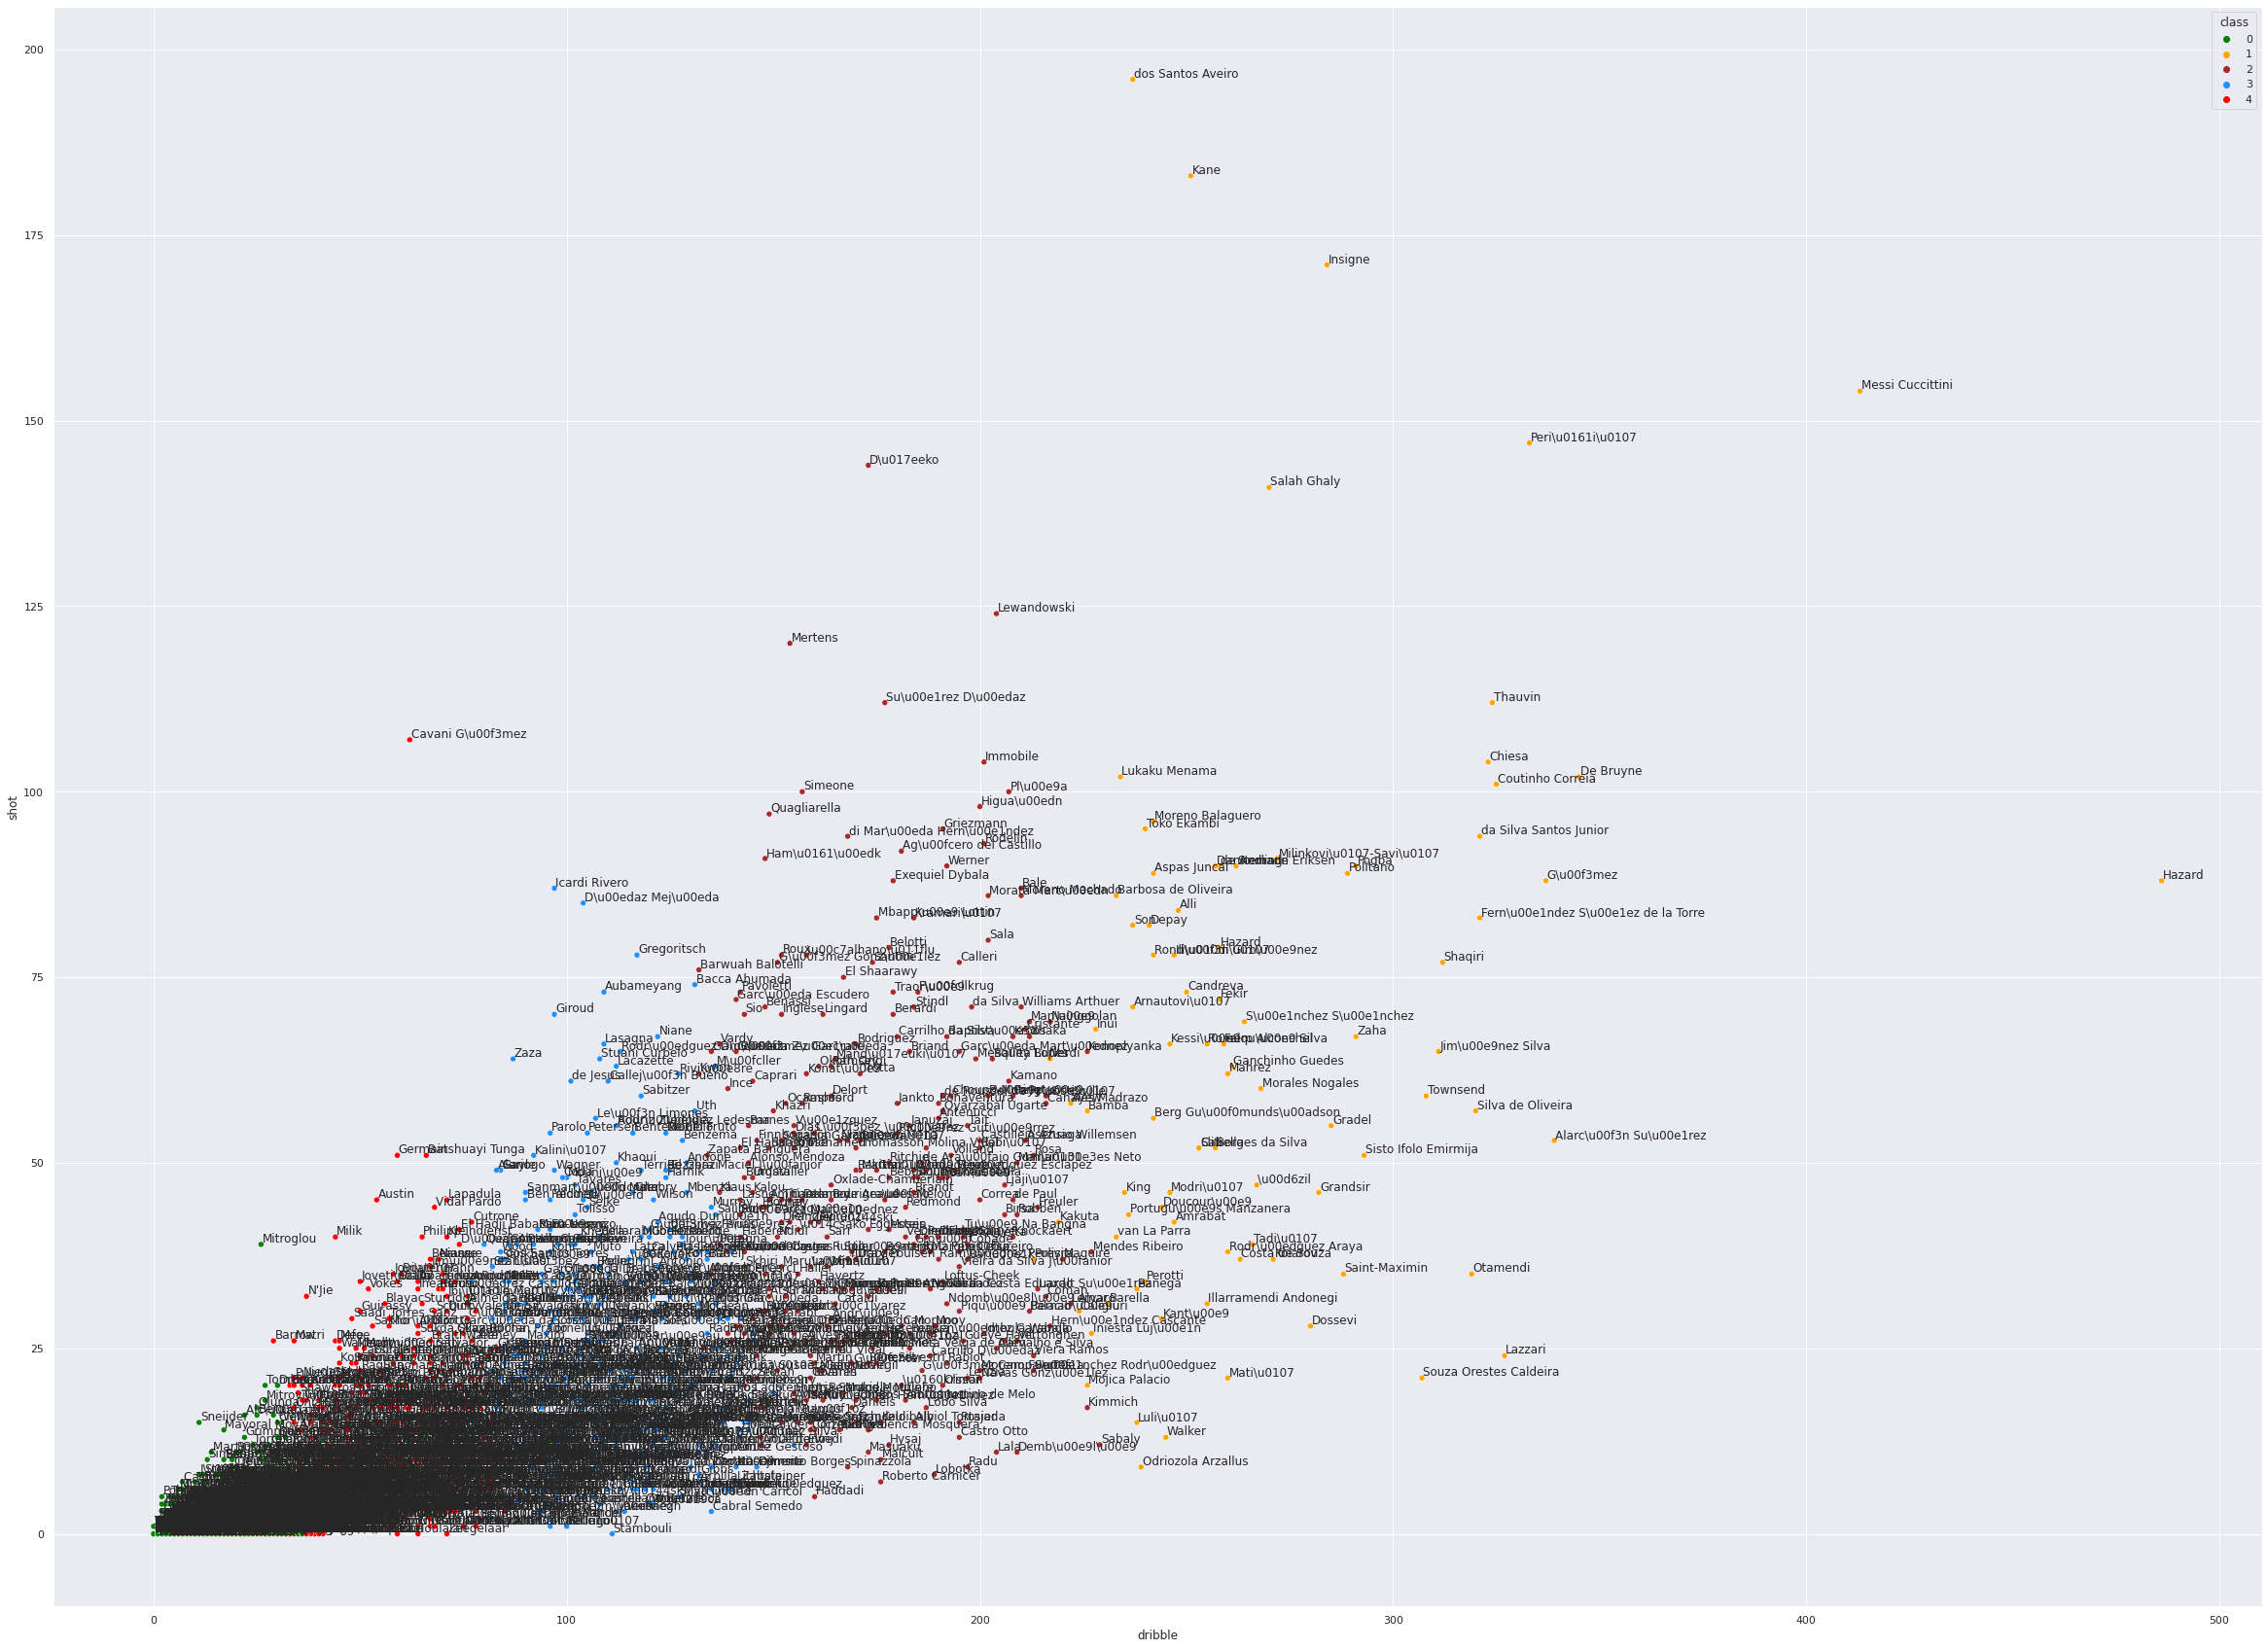

In [ ]:
plot_result(offensive,'shot','dribble','class',['green','orange','brown','dodgerblue','red'])

In [ ]:
data = offensive[['shot' , 'dribble' , 'take_on']]
offensive["class"] = kcluster(data , 11)
offensive.head()


Unnamed: 0  dribble  take_on  shot  player_id                         name  \
0           0       55       23     3     8643.0                       Lowton   
1           1      242       44    56       93.0  Berg Gu\u00f0munds\u00adson   
2           2       84        7    38     9206.0                         Wood   
3           3       94       16     8     8433.0                         Ward   
4           4      235       99    46     9637.0                         King   

   class  
0      9  
1     10  
2      5  
3      5  
4     10

In an attempt to enhance clustering, I increased the number of \(k\) to 10. This proved successful, creating more exclusive, smaller groups. Notably, Kane and Lewandowski are now in the same class, while Messi, Insigne, and Hazard form a distinct group. Salah and Depay are also clustered together. This outcome is highly impressive.

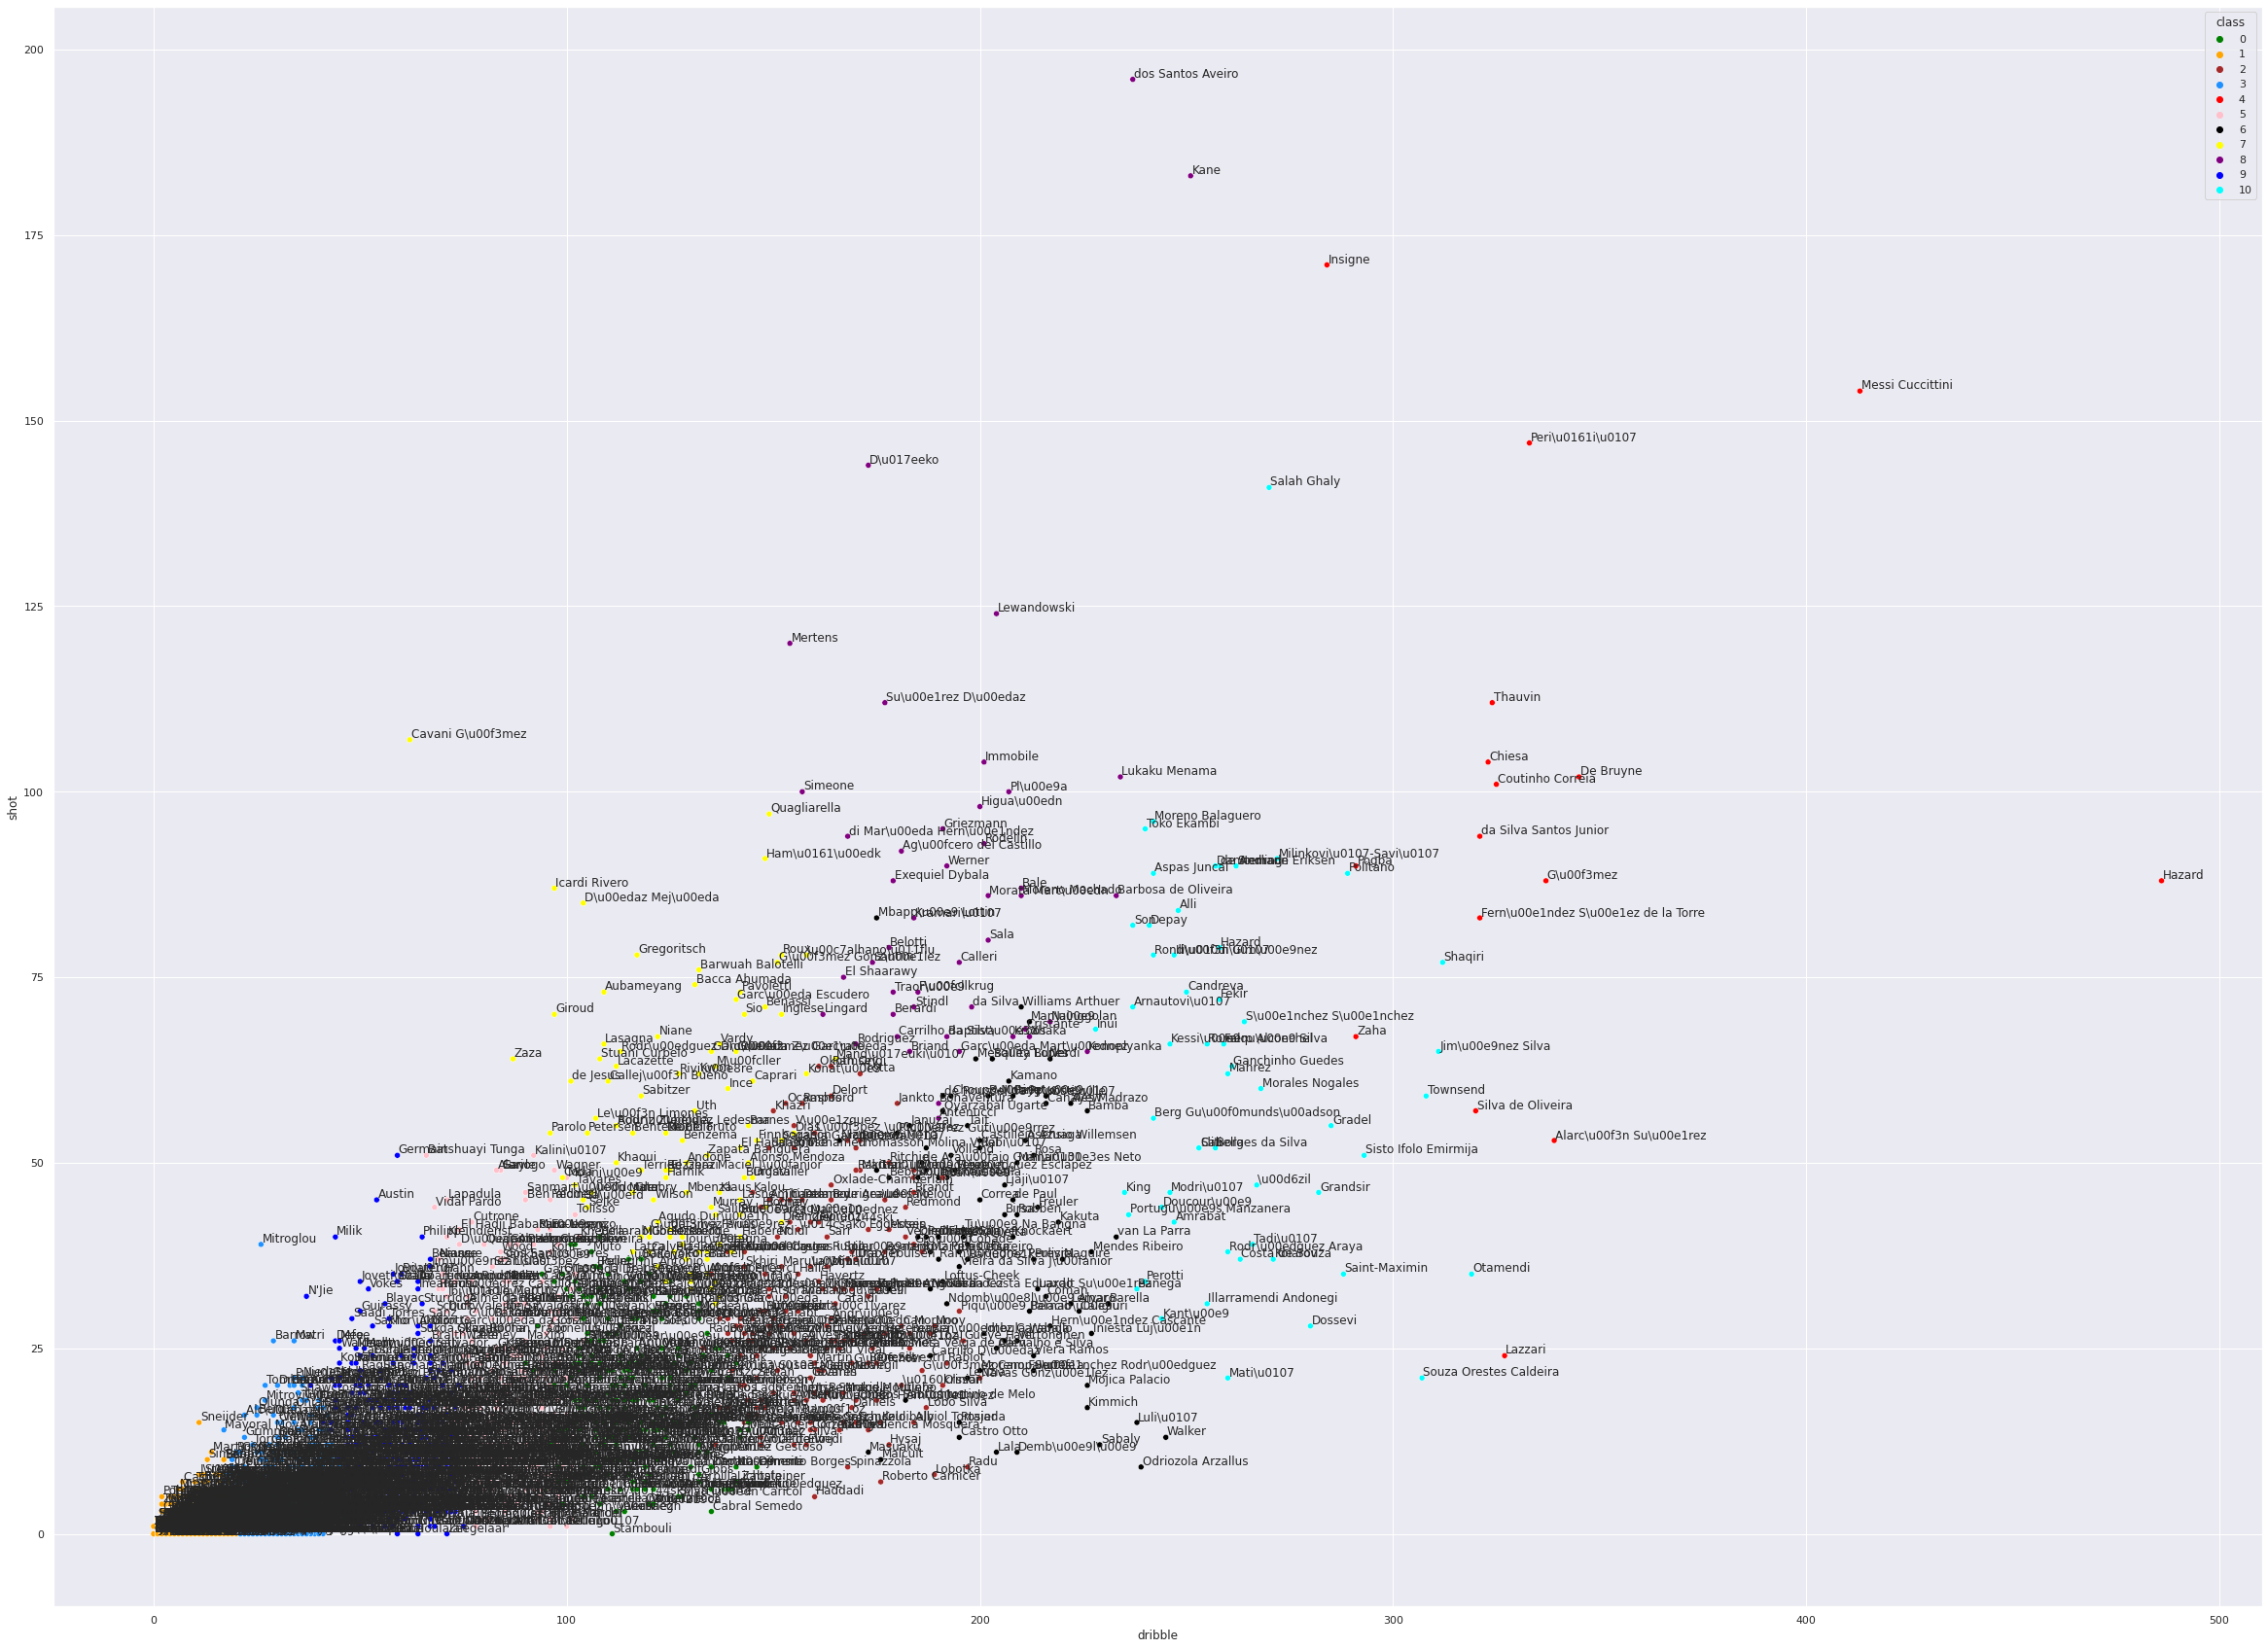

In [ ]:
plot_result(offensive,'shot','dribble','class',['green','orange','brown','dodgerblue','red','pink','black','yellow' , 'purple','blue','cyan'])

In [ ]:
offensive.to_csv("/content/drive/MyDrive/turk/database/offensive_classes.csv")